<a href="https://colab.research.google.com/github/crux007/crux007/blob/main/Assignment_Final_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

In [5]:
from sklearn.model_selection import GridSearchCV

In [66]:
from sklearn import svm

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Data_Scaled.csv")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("Attrition", axis=1), data["Attrition"], test_size=0.2, random_state=42)

In [4]:
knn = KNeighborsClassifier()

In [11]:
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

In [12]:
knn = KNeighborsClassifier(metric='manhattan')

In [13]:
knn_gs = GridSearchCV(knn, param_grid, cv=5)

In [14]:
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='manhattan'),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [16]:
knn_pred = knn_gs.predict(X_test)

In [17]:
knn_acc = accuracy_score(y_test, knn_pred)

In [18]:
print(knn_acc)

0.9269311064718163


In [19]:
gbm = GradientBoostingClassifier()

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
gbm_cv = cross_val_score(gbm, X_train, y_train, cv=5)

In [23]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [24]:
gbm_pred = gbm.predict(X_test)

In [25]:
gbm_acc = accuracy_score(y_test, gbm_pred)

In [26]:
print(gbm_acc)

0.9227557411273486


In [68]:
from sklearn.preprocessing import RobustScaler

In [69]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
svm = SVC(probability=True)

In [71]:
svm_param_grid = {'kernel': ['linear'],
                   'C': [0.01, 0.1],
                   'gamma': [0.01, 0.1]}

In [72]:
svm_grid = GridSearchCV(svm, svm_param_grid, cv=5)

In [73]:
svm_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.1], 'gamma': [0.01, 0.1],
                         'kernel': ['linear']})

In [74]:
svm_pred = svm_grid.predict(X_test_scaled)

In [75]:
svm_acc = accuracy_score(y_test, svm_pred)

In [76]:
print(svm_acc)

0.9227557411273486


In [77]:
rf = RandomForestClassifier(n_estimators=100)

In [78]:
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [5, 10, None]}

In [79]:
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5)

In [80]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [81]:
rf_pred = rf.predict(X_test)

In [82]:
rf_acc = accuracy_score(y_test, rf_pred)

In [83]:
print(rf_acc)

0.9290187891440501


In [84]:
print("KNN Accuracy:", knn_acc)
print("SVM Accuracy:", svm_acc)
print("Random Forest Accuracy:", rf_acc)
print("Gradient Boosting Accuracy:", gbm_acc)

KNN Accuracy: 0.9269311064718163
SVM Accuracy: 0.9227557411273486
Random Forest Accuracy: 0.9290187891440501
Gradient Boosting Accuracy: 0.9227557411273486


In [85]:
ensemble = VotingClassifier(estimators=[('knn', knn_gs), ('svm', svm_grid), ('rf', rf), ('gbm', gbm)], voting='soft')

In [86]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              GridSearchCV(cv=5,
                                           estimator=KNeighborsClassifier(metric='manhattan'),
                                           param_grid={'n_neighbors': [3, 5, 7],
                                                       'weights': ['uniform',
                                                                   'distance']})),
                             ('svm',
                              GridSearchCV(cv=5,
                                           estimator=SVC(probability=True),
                                           param_grid={'C': [0.01, 0.1],
                                                       'gamma': [0.01, 0.1],
                                                       'kernel': ['linear']})),
                             ('rf', RandomForestClassifier()),
                             ('gbm', GradientBoostingClassifier())],
                 voting='soft')

In [87]:
ensemble_pred = ensemble.predict(X_test)

In [88]:
ensemble_acc = accuracy_score(y_test, ensemble_pred)

In [89]:
print("Ensemble Accuracy:", ensemble_acc)

Ensemble Accuracy: 0.9436325678496869


In [91]:
import matplotlib.pyplot as plt

In [92]:
feature_importances = gbm.feature_importances_

In [93]:
fi_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})

In [94]:
fi_df = fi_df.sort_values(by='importance', ascending=False)

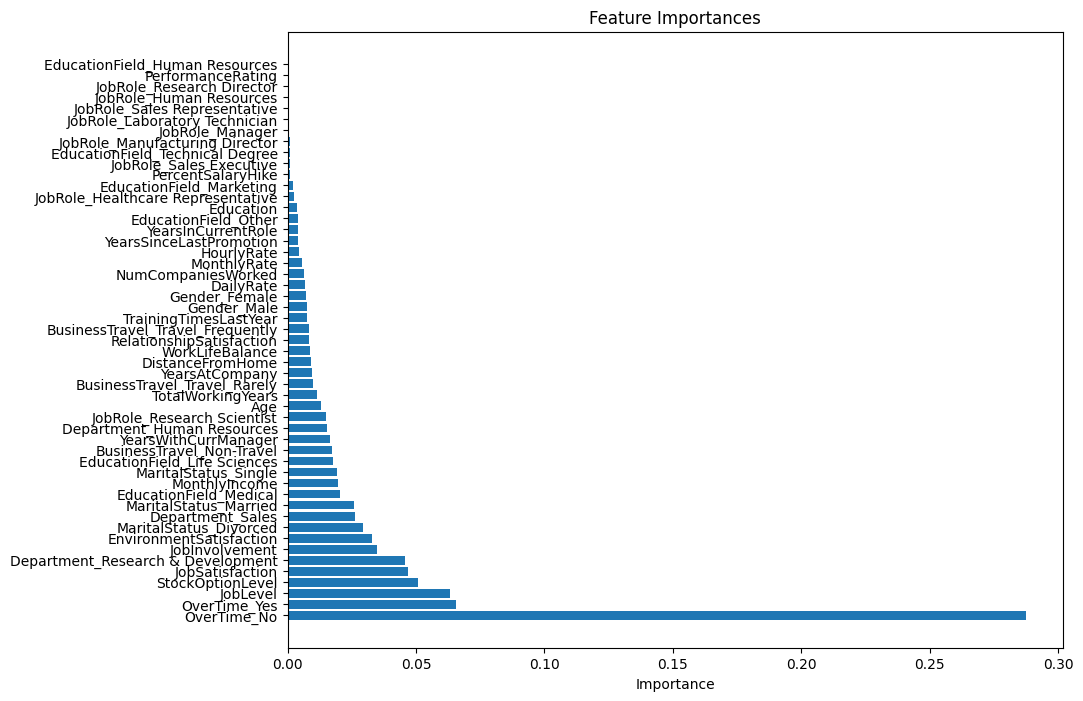

In [95]:
plt.figure(figsize=(10, 8))
plt.barh(fi_df['feature'], fi_df['importance'])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.show()